In [69]:
#LOADING THE DATA SET

In [70]:
import pandas as pd
# Loading JSON file into a DataFrame
df = pd.read_json("/content/loan_approval_dataset.json")

# Displaying the DataFrame
print(df)







            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_

In [71]:
#DATA EXPLORATION

In [72]:
# Checking the info of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB
None


In [73]:
# Checking for missing values
print(df.isnull().sum())

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [74]:
# Summarizing statistics of numerical columns
print(df.describe())

                  Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000  252000.000000   
mean   126000.500000  4.997117e+06      49.954071      10.084437   
std     72746.278255  2.878311e+06      17.063855       6.002590   
min         1.000000  1.031000e+04      21.000000       0.000000   
25%     63000.750000  2.503015e+06      35.000000       5.000000   
50%    126000.500000  5.000694e+06      50.000000      10.000000   
75%    189000.250000  7.477502e+06      65.000000      15.000000   
max    252000.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS      Risk_Flag  
count    252000.000000      252000.000000  252000.000000  
mean          6.333877          11.997794       0.123000  
std           3.647053           1.399037       0.328438  
min           0.000000          10.000000       0.000000  
25%           3.000000          11.000000       0.000000  
50%           6.000000          1

In [75]:
# Checking the distribution of the target variable 'Risk_Flag'
print(df['Risk_Flag'].value_counts())


Risk_Flag
0    221004
1     30996
Name: count, dtype: int64


In [76]:
#CHECKING OUTLIERS
column_name = 'Income'

# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Defining outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Outliers detected:")
print(outliers)


Outliers detected:
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []


In [77]:
# DATA VISUALIZATION

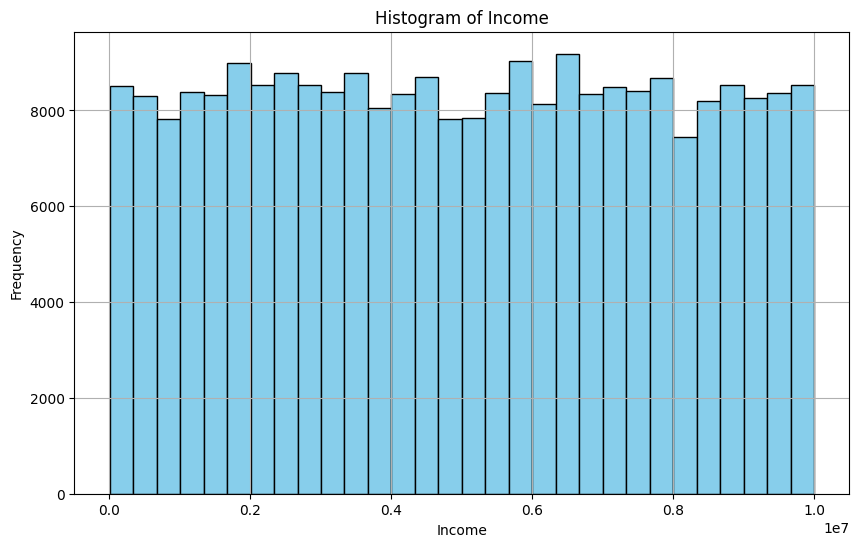

In [78]:
income_data = df['Income']

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(income_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


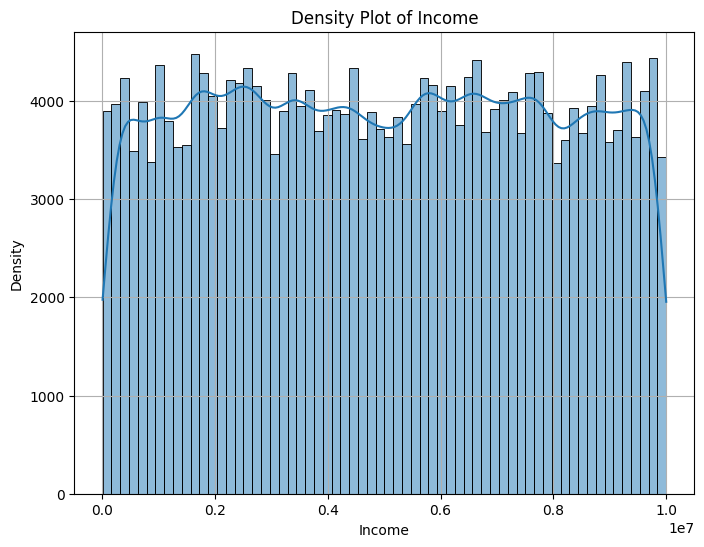

In [79]:
import seaborn as sns

# Creating a density plot using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=column_name, kde=True)
plt.title(f'Density Plot of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.grid(True)

# Displaying the plot
plt.show()


In [80]:
# DATA TRANFORMATION

In [81]:
df = df.drop('Id', axis=1)

In [82]:
# ENCODING : FEATURE Married/Single
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Married/Single'] = encoder.fit_transform(df['Married/Single'])


In [83]:
# ENCODING : FEATURE House_Ownership
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['House_Ownership'] = encoder.fit_transform(df['House_Ownership'])

In [84]:
# ENCODING : FEATURE Car_Ownership
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Car_Ownership'] = encoder.fit_transform(df['Car_Ownership'])

In [85]:
# ENCODING : FEATURE Profession
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['Profession'] = encoder.fit_transform(df['Profession'])

In [86]:
# ENCODING : FEATURE CITY
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['CITY'] = encoder.fit_transform(df['CITY'])

In [87]:
# ENCODING : FEATURE STATE
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['STATE'] = encoder.fit_transform(df['STATE'])

In [88]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [89]:
# SCALING
####### NOT NEEDED FOR OUR DATA SET BUT JUST TO SHOW I HAVE DONE #######################3
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Specifing the column name to scale
column_name = 'Income'

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fiting and transforming the data

scaled_data = scaler.fit_transform(df[[column_name]])

# Creating a new DataFrame with the scaled data
df_scaled = df.copy()
df_scaled[column_name] = scaled_data

# DisplayING the first few rows of the original and scaled DataFrame
print("Original Data:")
print(df.head())

print("\nScaled Data:")
print(df_scaled.head())


Original Data:
    Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               1                2              0   
1  7574516   40          10               1                2              0   
2  3991815   66           4               0                2              0   
3  6256451   41           2               1                2              1   
4  5768871   47          11               1                2              0   

   Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0          33   251     13                3                 13          0  
1          43   227     14                9                 13          0  
2          47     8     12                4                 10          0  
3          43    54     17                2                 12          1  
4          11   296     22                3                 14          1  

Scaled Data:
     Income  Age  Experience  Married/Si

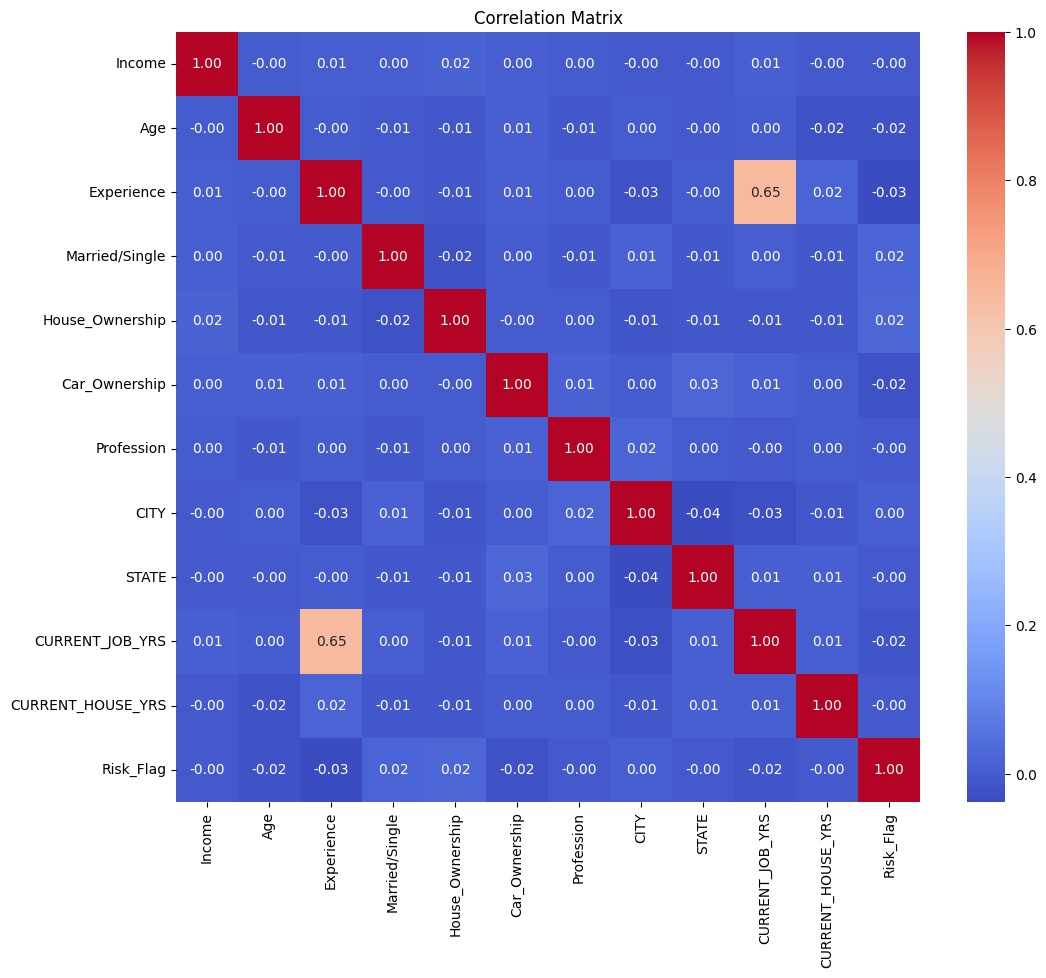

In [90]:
# FEATURE SELECTION

import matplotlib.pyplot as plt
import seaborn as sns

# Calculating correlation matrix
correlation_matrix = df.corr()

# Ploting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Geting the correlation of all features with the target variable 'Risk_Flag'
corr_with_target = correlation_matrix['Risk_Flag'].abs().sort_values(ascending=False)

# Printing correlations with Risk_Flag
print("\nCorrelation with Risk_Flag:")
print(corr_with_target)

# Selecting features with high correlation with Risk_Flag (adjust threshold as per dataset)
selected_features = corr_with_target[corr_with_target > 0.01].index.tolist()
selected_features.remove('Risk_Flag')

# Creating a new DataFrame with the selected features
df_selected = df[selected_features + ['Risk_Flag']]

# Spliting the data into training and testing sets
X = df_selected[selected_features]
y = df_selected['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Selected Features:")
print(selected_features)


Correlation with Risk_Flag:
Risk_Flag            1.000000
Experience           0.034523
Car_Ownership        0.024036
House_Ownership      0.023622
Age                  0.021809
Married/Single       0.021092
CURRENT_JOB_YRS      0.016942
Profession           0.004900
CITY                 0.004575
CURRENT_HOUSE_YRS    0.004375
STATE                0.003401
Income               0.003091
Name: Risk_Flag, dtype: float64
Selected Features:
['Experience', 'Car_Ownership', 'House_Ownership', 'Age', 'Married/Single', 'CURRENT_JOB_YRS']


In [98]:
# Initializing the Logistic Regression model
model = LogisticRegression()

# Traning the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8773677248677249
Confusion Matrix:
 [[66329     0]
 [ 9271     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
